In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Fracatlas'  # Change this if needed

# Check if the path exists
if os.path.exists(dataset_path):
    print("✅ Dataset folder found!")
else:
    print("❌ Dataset path is incorrect. Please check it.")

✅ Dataset folder found!


In [ ]:
import os
import shutil

base = '/content/drive/MyDrive/Fracatlas'

# Step 1: Fix typo in validation/lables → labels
val_labels_old = os.path.join(base, 'validation/lables')
val_labels_new = os.path.join(base, 'validation/labels')
if os.path.exists(val_labels_old):
    os.rename(val_labels_old, val_labels_new)
    print("✅ Renamed 'lables' to 'labels' in validation/")
else:
    print("❌ 'lables' folder not found. Skipping rename.")

# Step 2: Create YOLO-style folders
folders = ['images/train', 'images/val', 'images/test',
           'labels/train', 'labels/val', 'labels/test']
for folder in folders:
    os.makedirs(os.path.join(base, folder), exist_ok=True)

# Step 3: Move all data to new folders
# Mapping of source → destination
mapping = {
    'train/images': 'images/train',
    'train/labels': 'labels/train',
    'validation/images': 'images/val',
    'validation/labels': 'labels/val',
    'test/images': 'images/test',
    'test/labels': 'labels/test',
}

for src, dst in mapping.items():
    src_path = os.path.join(base, src)
    dst_path = os.path.join(base, dst)
    if os.path.exists(src_path):
        for file in os.listdir(src_path):
            shutil.move(os.path.join(src_path, file), dst_path)
        print(f"✅ Moved {src} → {dst}")
    else:
        print(f"❌ Source not found: {src_path}")

print("🎉 Folder structure ready for YOLOv8!")

✅ Renamed 'lables' to 'labels' in validation/
✅ Moved train/images → images/train
✅ Moved train/labels → labels/train
✅ Moved validation/images → images/val
✅ Moved validation/labels → labels/val
✅ Moved test/images → images/test
✅ Moved test/labels → labels/test
🎉 Folder structure ready for YOLOv8!


In [ ]:
yaml_content = """
path: /content/drive/MyDrive/Fracatlas
train: images/train
val: images/val
test: images/test

nc: 1
names: ['fracture']
"""

with open('/content/fracatlas.yaml', 'w') as f:
    f.write(yaml_content)

print("✅ YAML file created at /content/fracatlas.yaml")

✅ YAML file created at /content/fracatlas.yaml


In [ ]:
from ultralytics import YOLO

# Load pretrained model
model = YOLO('yolov8s.pt')

# Start training with improved settings
model.train(
    data='/content/fracatlas.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    augment=True,
    name='frac_yolov8s_augmented'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fracatlas.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=frac_yolov8s_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.0±0.0 MB/s, size: 16.6 KB)


train: Scanning /content/drive/MyDrive/Fracatlas/labels/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 16.0 KB)


val: Scanning /content/drive/MyDrive/Fracatlas/labels/val.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]


Plotting labels to runs/detect/frac_yolov8s_augmented/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/frac_yolov8s_augmented
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.92G      2.748       5.66      1.875         18        640: 100%|██████████| 72/72 [00:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all         82         91     0.0171      0.242    0.00791    0.00258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.34G      2.614       2.94      1.815         13        640: 100%|██████████| 72/72 [00:17<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.47it/s]


                   all         82         91     0.0116      0.187    0.00634    0.00211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G      2.597      2.756      1.789         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all         82         91    0.00191      0.319    0.00138   0.000398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      2.635      2.641      1.868         10        640: 100%|██████████| 72/72 [00:18<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all         82         91      0.061      0.187     0.0218     0.0067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G      2.608      2.571       1.81          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]

                   all         82         91     0.0805      0.176     0.0575     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      2.554      2.439      1.831         12        640: 100%|██████████| 72/72 [00:19<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.73it/s]

                   all         82         91      0.221      0.165     0.0994     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.41G      2.435      2.384      1.749         12        640: 100%|██████████| 72/72 [00:17<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all         82         91      0.266      0.264      0.121     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.41G      2.379      2.229      1.714         12        640: 100%|██████████| 72/72 [00:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all         82         91      0.374      0.319      0.299      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.41G      2.417      2.181      1.736         11        640: 100%|██████████| 72/72 [00:18<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.36it/s]


                   all         82         91      0.432      0.209      0.233     0.0757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.41G      2.378      2.119      1.716         12        640: 100%|██████████| 72/72 [00:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

                   all         82         91        0.3      0.334      0.274     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.41G      2.319      2.056      1.699         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all         82         91      0.423      0.352      0.292      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.41G      2.325      2.074      1.664         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]

                   all         82         91      0.512      0.346      0.359       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.45G      2.262      2.048      1.666         13        640: 100%|██████████| 72/72 [00:18<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.90it/s]

                   all         82         91      0.508      0.418      0.363       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.48G      2.159      1.992      1.585         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]

                   all         82         91        0.3      0.275      0.209      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.48G      2.187      1.995      1.628         14        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.74it/s]

                   all         82         91      0.434      0.346      0.318      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.48G      2.122      1.812      1.565         13        640: 100%|██████████| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.32it/s]

                   all         82         91      0.584      0.308      0.372      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.48G      2.165      1.914      1.635         20        640: 100%|██████████| 72/72 [00:18<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]


                   all         82         91      0.549      0.362      0.357      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.48G      2.164      1.892      1.586         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all         82         91      0.448      0.429      0.366      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.48G      2.175      1.872      1.627         21        640: 100%|██████████| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all         82         91      0.507      0.319      0.328      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.52G      2.103      1.736      1.534         10        640: 100%|██████████| 72/72 [00:18<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]

                   all         82         91      0.507      0.374      0.387      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.52G      2.092      1.781      1.543          6        640: 100%|██████████| 72/72 [00:17<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all         82         91       0.59      0.374      0.408      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.52G      2.074      1.764      1.538         12        640: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all         82         91      0.459      0.476      0.411      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.52G       2.08      1.792      1.543         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.24it/s]

                   all         82         91      0.475      0.407      0.385      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.52G      2.043      1.721      1.543         12        640: 100%|██████████| 72/72 [00:19<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.31it/s]

                   all         82         91      0.477      0.471      0.394       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.52G      2.085      1.678      1.542          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.62it/s]

                   all         82         91       0.52      0.381      0.403      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.52G      2.033      1.676      1.507         16        640: 100%|██████████| 72/72 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         82         91      0.474      0.341      0.377      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.52G      1.967      1.684       1.53         18        640: 100%|██████████| 72/72 [00:17<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]


                   all         82         91      0.545      0.363      0.379      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.52G      1.995      1.655      1.496         11        640: 100%|██████████| 72/72 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]

                   all         82         91      0.646      0.361      0.425      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.52G      2.006       1.63      1.513         18        640: 100%|██████████| 72/72 [00:17<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.66it/s]

                   all         82         91      0.517      0.418      0.457      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.52G      1.981      1.616      1.454         17        640: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]

                   all         82         91      0.521      0.363      0.421      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.52G      1.909      1.539      1.473         13        640: 100%|██████████| 72/72 [00:18<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.23it/s]

                   all         82         91      0.471      0.418      0.358      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.52G      1.955      1.538       1.48         22        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all         82         91      0.606      0.374      0.414      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.52G      1.925      1.583      1.455         15        640: 100%|██████████| 72/72 [00:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all         82         91      0.575      0.416      0.435      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.52G      1.946      1.591      1.476         17        640: 100%|██████████| 72/72 [00:16<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.56it/s]

                   all         82         91      0.632      0.415      0.439       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.52G      1.938       1.51       1.45         17        640: 100%|██████████| 72/72 [00:18<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all         82         91      0.668      0.462      0.489      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.52G      1.863      1.471      1.448         17        640: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all         82         91      0.425      0.473      0.402      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.56G      1.936      1.529       1.44         12        640: 100%|██████████| 72/72 [00:17<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all         82         91      0.432      0.429      0.422      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.56G      1.804      1.392      1.382          8        640: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all         82         91      0.565      0.418      0.447      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.56G      1.873      1.465      1.428         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all         82         91      0.645      0.429      0.474      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.56G      1.824       1.42      1.418         13        640: 100%|██████████| 72/72 [00:18<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.34it/s]

                   all         82         91      0.564      0.413       0.44      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.56G      1.831      1.418      1.413         15        640: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.30it/s]


                   all         82         91      0.686      0.481       0.52      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.56G      1.786      1.349      1.387          8        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all         82         91      0.679      0.407      0.483      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.56G      1.775      1.361      1.388         15        640: 100%|██████████| 72/72 [00:17<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all         82         91      0.605      0.451      0.442      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.56G      1.765      1.369      1.365          9        640: 100%|██████████| 72/72 [00:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]

                   all         82         91      0.506      0.518      0.503      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.56G      1.797      1.317      1.351         14        640: 100%|██████████| 72/72 [00:18<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         82         91      0.649      0.473      0.492      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.56G      1.685      1.272      1.348         13        640: 100%|██████████| 72/72 [00:17<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]

                   all         82         91       0.64      0.407      0.471        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.56G      1.735      1.263      1.347         16        640: 100%|██████████| 72/72 [00:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all         82         91      0.674      0.462       0.47      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.56G      1.756      1.337      1.389         17        640: 100%|██████████| 72/72 [00:17<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all         82         91      0.635       0.44      0.455      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.56G      1.752      1.305      1.367         15        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all         82         91      0.565      0.451      0.457      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.56G      1.683       1.26      1.347         16        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.76it/s]

                   all         82         91      0.594      0.473      0.488      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.56G      1.712      1.203      1.318          9        640: 100%|██████████| 72/72 [00:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.37it/s]


                   all         82         91      0.569       0.45      0.387      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.56G      1.695      1.232      1.343          7        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all         82         91      0.507      0.429        0.4      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.56G      1.629      1.179      1.309          8        640: 100%|██████████| 72/72 [00:18<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all         82         91      0.639      0.495      0.509      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.56G      1.646       1.21      1.306         21        640: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all         82         91      0.557      0.401      0.456      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.56G      1.664      1.172      1.296         14        640: 100%|██████████| 72/72 [00:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all         82         91      0.511      0.505      0.468      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.56G      1.643      1.212      1.318         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]

                   all         82         91      0.509      0.527       0.47      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.56G      1.662      1.165      1.328         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]

                   all         82         91      0.548      0.516      0.502        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.56G      1.595      1.122      1.288         11        640: 100%|██████████| 72/72 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all         82         91      0.656      0.473      0.529       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.57G      1.618       1.18      1.287         13        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.57it/s]

                   all         82         91      0.594      0.505       0.51      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.57G      1.536      1.083      1.257         11        640: 100%|██████████| 72/72 [00:19<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all         82         91      0.668      0.418      0.513      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.57G      1.559      1.095      1.267         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all         82         91      0.684      0.429      0.515      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.57G      1.536      1.049      1.257         15        640: 100%|██████████| 72/72 [00:19<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.97it/s]

                   all         82         91      0.714      0.484      0.529      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.57G      1.599      1.052      1.282          6        640: 100%|██████████| 72/72 [00:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all         82         91      0.723      0.429      0.529      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.57G      1.606      1.065       1.28         11        640: 100%|██████████| 72/72 [00:19<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]

                   all         82         91      0.595      0.495      0.537      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.57G      1.558      1.068      1.283         13        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.02it/s]

                   all         82         91      0.658      0.466      0.481      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.57G      1.508      1.018      1.219         13        640: 100%|██████████| 72/72 [00:18<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all         82         91       0.66      0.451      0.522      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.57G      1.552      1.033      1.255         14        640: 100%|██████████| 72/72 [00:18<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all         82         91      0.604      0.452      0.464      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.57G      1.506     0.9656      1.226          7        640: 100%|██████████| 72/72 [00:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.29it/s]


                   all         82         91      0.533      0.538      0.504      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.57G      1.477     0.9845      1.253          7        640: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all         82         91      0.609      0.496      0.519      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.57G      1.455     0.9698      1.198          8        640: 100%|██████████| 72/72 [00:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]

                   all         82         91      0.729      0.442      0.539       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.57G      1.443     0.9836      1.204         19        640: 100%|██████████| 72/72 [00:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all         82         91      0.575       0.56      0.522      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.57G      1.462     0.9584      1.207         18        640: 100%|██████████| 72/72 [00:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all         82         91       0.78      0.451      0.551      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.57G      1.435     0.9634      1.206         22        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.26it/s]

                   all         82         91       0.59      0.523       0.54      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.57G      1.403     0.9063      1.194         13        640: 100%|██████████| 72/72 [00:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

                   all         82         91      0.717      0.484      0.581      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.57G      1.461     0.9365      1.212          7        640: 100%|██████████| 72/72 [00:18<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all         82         91      0.646      0.562      0.564      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.57G      1.454     0.9215      1.202         16        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all         82         91      0.646      0.527      0.575      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.57G      1.385     0.9019      1.185         12        640: 100%|██████████| 72/72 [00:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.33it/s]

                   all         82         91      0.687      0.505      0.521      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.57G       1.41     0.9561      1.185          9        640: 100%|██████████| 72/72 [00:19<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.26it/s]

                   all         82         91      0.593      0.577      0.558      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.57G      1.392     0.8841      1.176         18        640: 100%|██████████| 72/72 [00:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]

                   all         82         91      0.666      0.516      0.521      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.57G       1.39     0.8752      1.151         17        640: 100%|██████████| 72/72 [00:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all         82         91      0.683      0.473        0.5      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.57G      1.358     0.8744      1.164         16        640: 100%|██████████| 72/72 [00:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.74it/s]

                   all         82         91      0.675      0.527       0.52       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.57G      1.379     0.8917      1.186         12        640: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.57it/s]

                   all         82         91      0.657      0.526      0.507      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.57G      1.302      0.859       1.14         14        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all         82         91      0.577       0.56      0.544      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.57G      1.334     0.8559      1.158         12        640: 100%|██████████| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all         82         91      0.654      0.549      0.564      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.57G      1.329     0.8637      1.151         16        640: 100%|██████████| 72/72 [00:18<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.37it/s]

                   all         82         91      0.686      0.527      0.546       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.57G      1.297      0.815      1.133         20        640: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]

                   all         82         91       0.82      0.473      0.531       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.57G      1.326     0.8328      1.139         14        640: 100%|██████████| 72/72 [00:17<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]


                   all         82         91      0.682      0.538      0.525      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.57G      1.281     0.8292      1.129         10        640: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all         82         91      0.692      0.445      0.501      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.57G      1.274     0.8048      1.142         16        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all         82         91       0.67      0.516      0.515      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.57G      1.262     0.7967      1.127          9        640: 100%|██████████| 72/72 [00:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]

                   all         82         91      0.686      0.505      0.544      0.233


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.57G      1.266     0.7936      1.181         10        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all         82         91      0.693      0.484      0.516      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.57G      1.229     0.7515      1.138          6        640: 100%|██████████| 72/72 [00:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]

                   all         82         91      0.581      0.538      0.498      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.57G      1.211     0.7423      1.145          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]

                   all         82         91        0.6      0.527      0.503      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.57G      1.192     0.7227      1.135          7        640: 100%|██████████| 72/72 [00:18<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.32it/s]

                   all         82         91      0.584      0.538      0.499      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.57G       1.18     0.7106      1.129          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]

                   all         82         91      0.692      0.494      0.507      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.57G      1.177     0.6957      1.118          7        640: 100%|██████████| 72/72 [00:18<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]

                   all         82         91      0.649      0.516      0.511      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.57G      1.126     0.6787      1.104          7        640: 100%|██████████| 72/72 [00:17<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.30it/s]

                   all         82         91      0.635      0.538      0.499      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.57G      1.177     0.6915      1.116          7        640: 100%|██████████| 72/72 [00:18<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         82         91       0.64      0.527      0.504      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.57G      1.129     0.6757      1.097          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.00it/s]

                   all         82         91      0.643      0.515      0.502      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.57G      1.132     0.6823      1.102          9        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]

                   all         82         91      0.697      0.481      0.494      0.227



100 epochs completed in 0.558 hours.
Optimizer stripped from runs/detect/frac_yolov8s_augmented/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/frac_yolov8s_augmented/weights/best.pt, 22.5MB

Validating runs/detect/frac_yolov8s_augmented/weights/best.pt...
Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]


                   all         82         91      0.606      0.541      0.547      0.247
Speed: 0.2ms preprocess, 18.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/frac_yolov8s_augmented


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9af8c7ab50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Load the trained model
model = YOLO('/content/runs/detect/frac_yolov8s_augmented/weights/best.pt')

# Evaluate on the validation set
metrics = model.val()

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 13.3±5.0 MB/s, size: 19.9 KB)


val: Scanning /content/drive/MyDrive/Fracatlas/labels/val.cache... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all         82         91      0.718      0.484       0.58      0.254
Speed: 4.5ms preprocess, 9.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Create a directory in Drive if it doesn't exist
import os
save_path = "/content/drive/MyDrive/Fracatlas/fracture_localizetion_model"
os.makedirs(save_path, exist_ok=True)

# Copy the best weights to Drive
!cp /content/runs/detect/frac_yolov8s_augmented/weights/best.pt "$save_path/frac_yolov8s_augmented_best.pt"

In [ ]:
# Run inference on all test images
results = model.predict(source='/content/drive/MyDrive/Fracatlas/images/test', save=True, conf=0.25)


image 1/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003297.jpg: 640x544 (no detections), 40.6ms
image 2/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003298.jpg: 640x544 (no detections), 15.8ms
image 3/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003301.jpg: 640x544 (no detections), 15.8ms
image 4/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003308.jpg: 640x544 2 fractures, 15.9ms
image 5/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003309.jpg: 544x640 (no detections), 39.7ms
image 6/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003310.jpg: 640x544 1 fracture, 16.7ms
image 7/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003311.jpg: 640x544 2 fractures, 15.9ms
image 8/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003312.jpg: 640x544 1 fracture, 16.3ms
image 9/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003313.jpg: 640x544 (no detections), 33.6ms
image 10/61 /content/drive/MyDrive/Fracatlas/images/test/IMG0003331.jpg: 640x544 

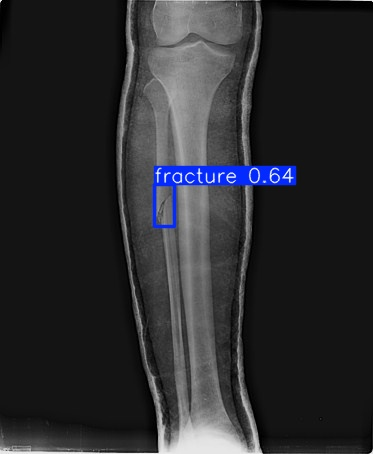

In [ ]:
from IPython.display import Image, display
display(Image('/content/runs/detect/predict/IMG0003466.jpg'))  # replace with any image name